In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
os.chdir("/home/onyxia/work/intent_classification/")
from src.data.processing_data import Format
from src.models.pipelines import Pipeline

2023-03-17 07:36:48.974299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 07:36:49.150671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 07:36:49.150692: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-17 07:36:49.862660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
pd.set_option('display.max_columns', None)
sns.set_theme()

# Prediction Global Report

In [3]:
_list_datasets_T = [["mrda", 50],
                    ["swda", 50],
                    ["dyda_da", 5],
                    ["dyda_e", 5],
                    ["meld_s", 5],
                    ["meld_e", 5]]

_list_encoder = ["bert-base-cased", "xlnet-base-cased"]

_list_data_format_decoder = [["MLP", "concatenate"], ["GRU", "separate"]]

_list_inputs = list(product(_list_datasets_T, _list_encoder, _list_data_format_decoder))

_possible_pipelines = {
                            "inputs": _list_inputs, 
                            "outputs": []
                        }

df_global_report = pd.DataFrame()

In [4]:
_possible_pipelines

{'inputs': [(['mrda', 50], 'bert-base-cased', ['MLP', 'concatenate']),
  (['mrda', 50], 'bert-base-cased', ['GRU', 'separate']),
  (['mrda', 50], 'xlnet-base-cased', ['MLP', 'concatenate']),
  (['mrda', 50], 'xlnet-base-cased', ['GRU', 'separate']),
  (['swda', 50], 'bert-base-cased', ['MLP', 'concatenate']),
  (['swda', 50], 'bert-base-cased', ['GRU', 'separate']),
  (['swda', 50], 'xlnet-base-cased', ['MLP', 'concatenate']),
  (['swda', 50], 'xlnet-base-cased', ['GRU', 'separate']),
  (['dyda_da', 5], 'bert-base-cased', ['MLP', 'concatenate']),
  (['dyda_da', 5], 'bert-base-cased', ['GRU', 'separate']),
  (['dyda_da', 5], 'xlnet-base-cased', ['MLP', 'concatenate']),
  (['dyda_da', 5], 'xlnet-base-cased', ['GRU', 'separate']),
  (['dyda_e', 5], 'bert-base-cased', ['MLP', 'concatenate']),
  (['dyda_e', 5], 'bert-base-cased', ['GRU', 'separate']),
  (['dyda_e', 5], 'xlnet-base-cased', ['MLP', 'concatenate']),
  (['dyda_e', 5], 'xlnet-base-cased', ['GRU', 'separate']),
  (['meld_s', 5], 

2023-03-17 07:36:52.594718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-17 07:36:52.594753: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 07:36:52.594780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-03-17 07:36:52.595132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.t

1/1 [==============================] - 0s 91ms/step


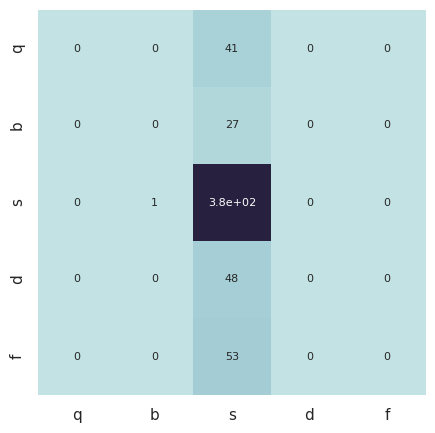

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predic

1/1 [==============================] - 0s 319ms/step


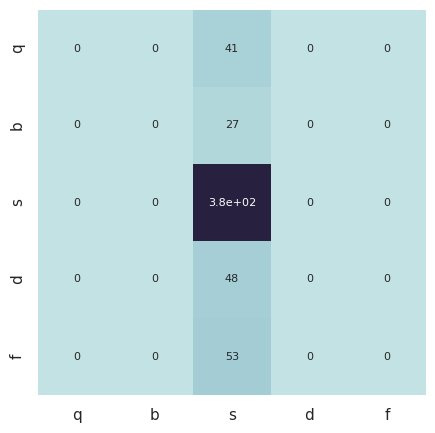

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another archite

1/1 [==============================] - 0s 68ms/step


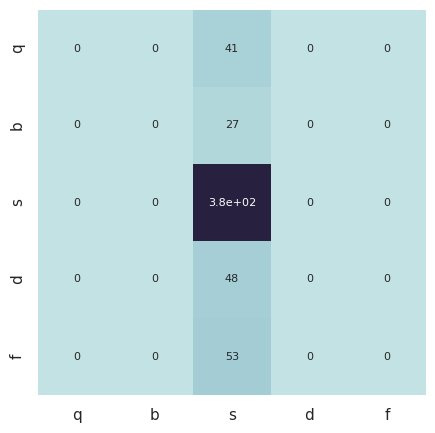

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another archite

1/1 [==============================] - 0s 342ms/step


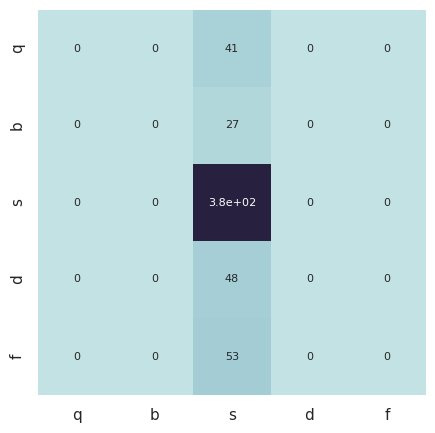

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predic

1/1 [==============================] - 0s 64ms/step


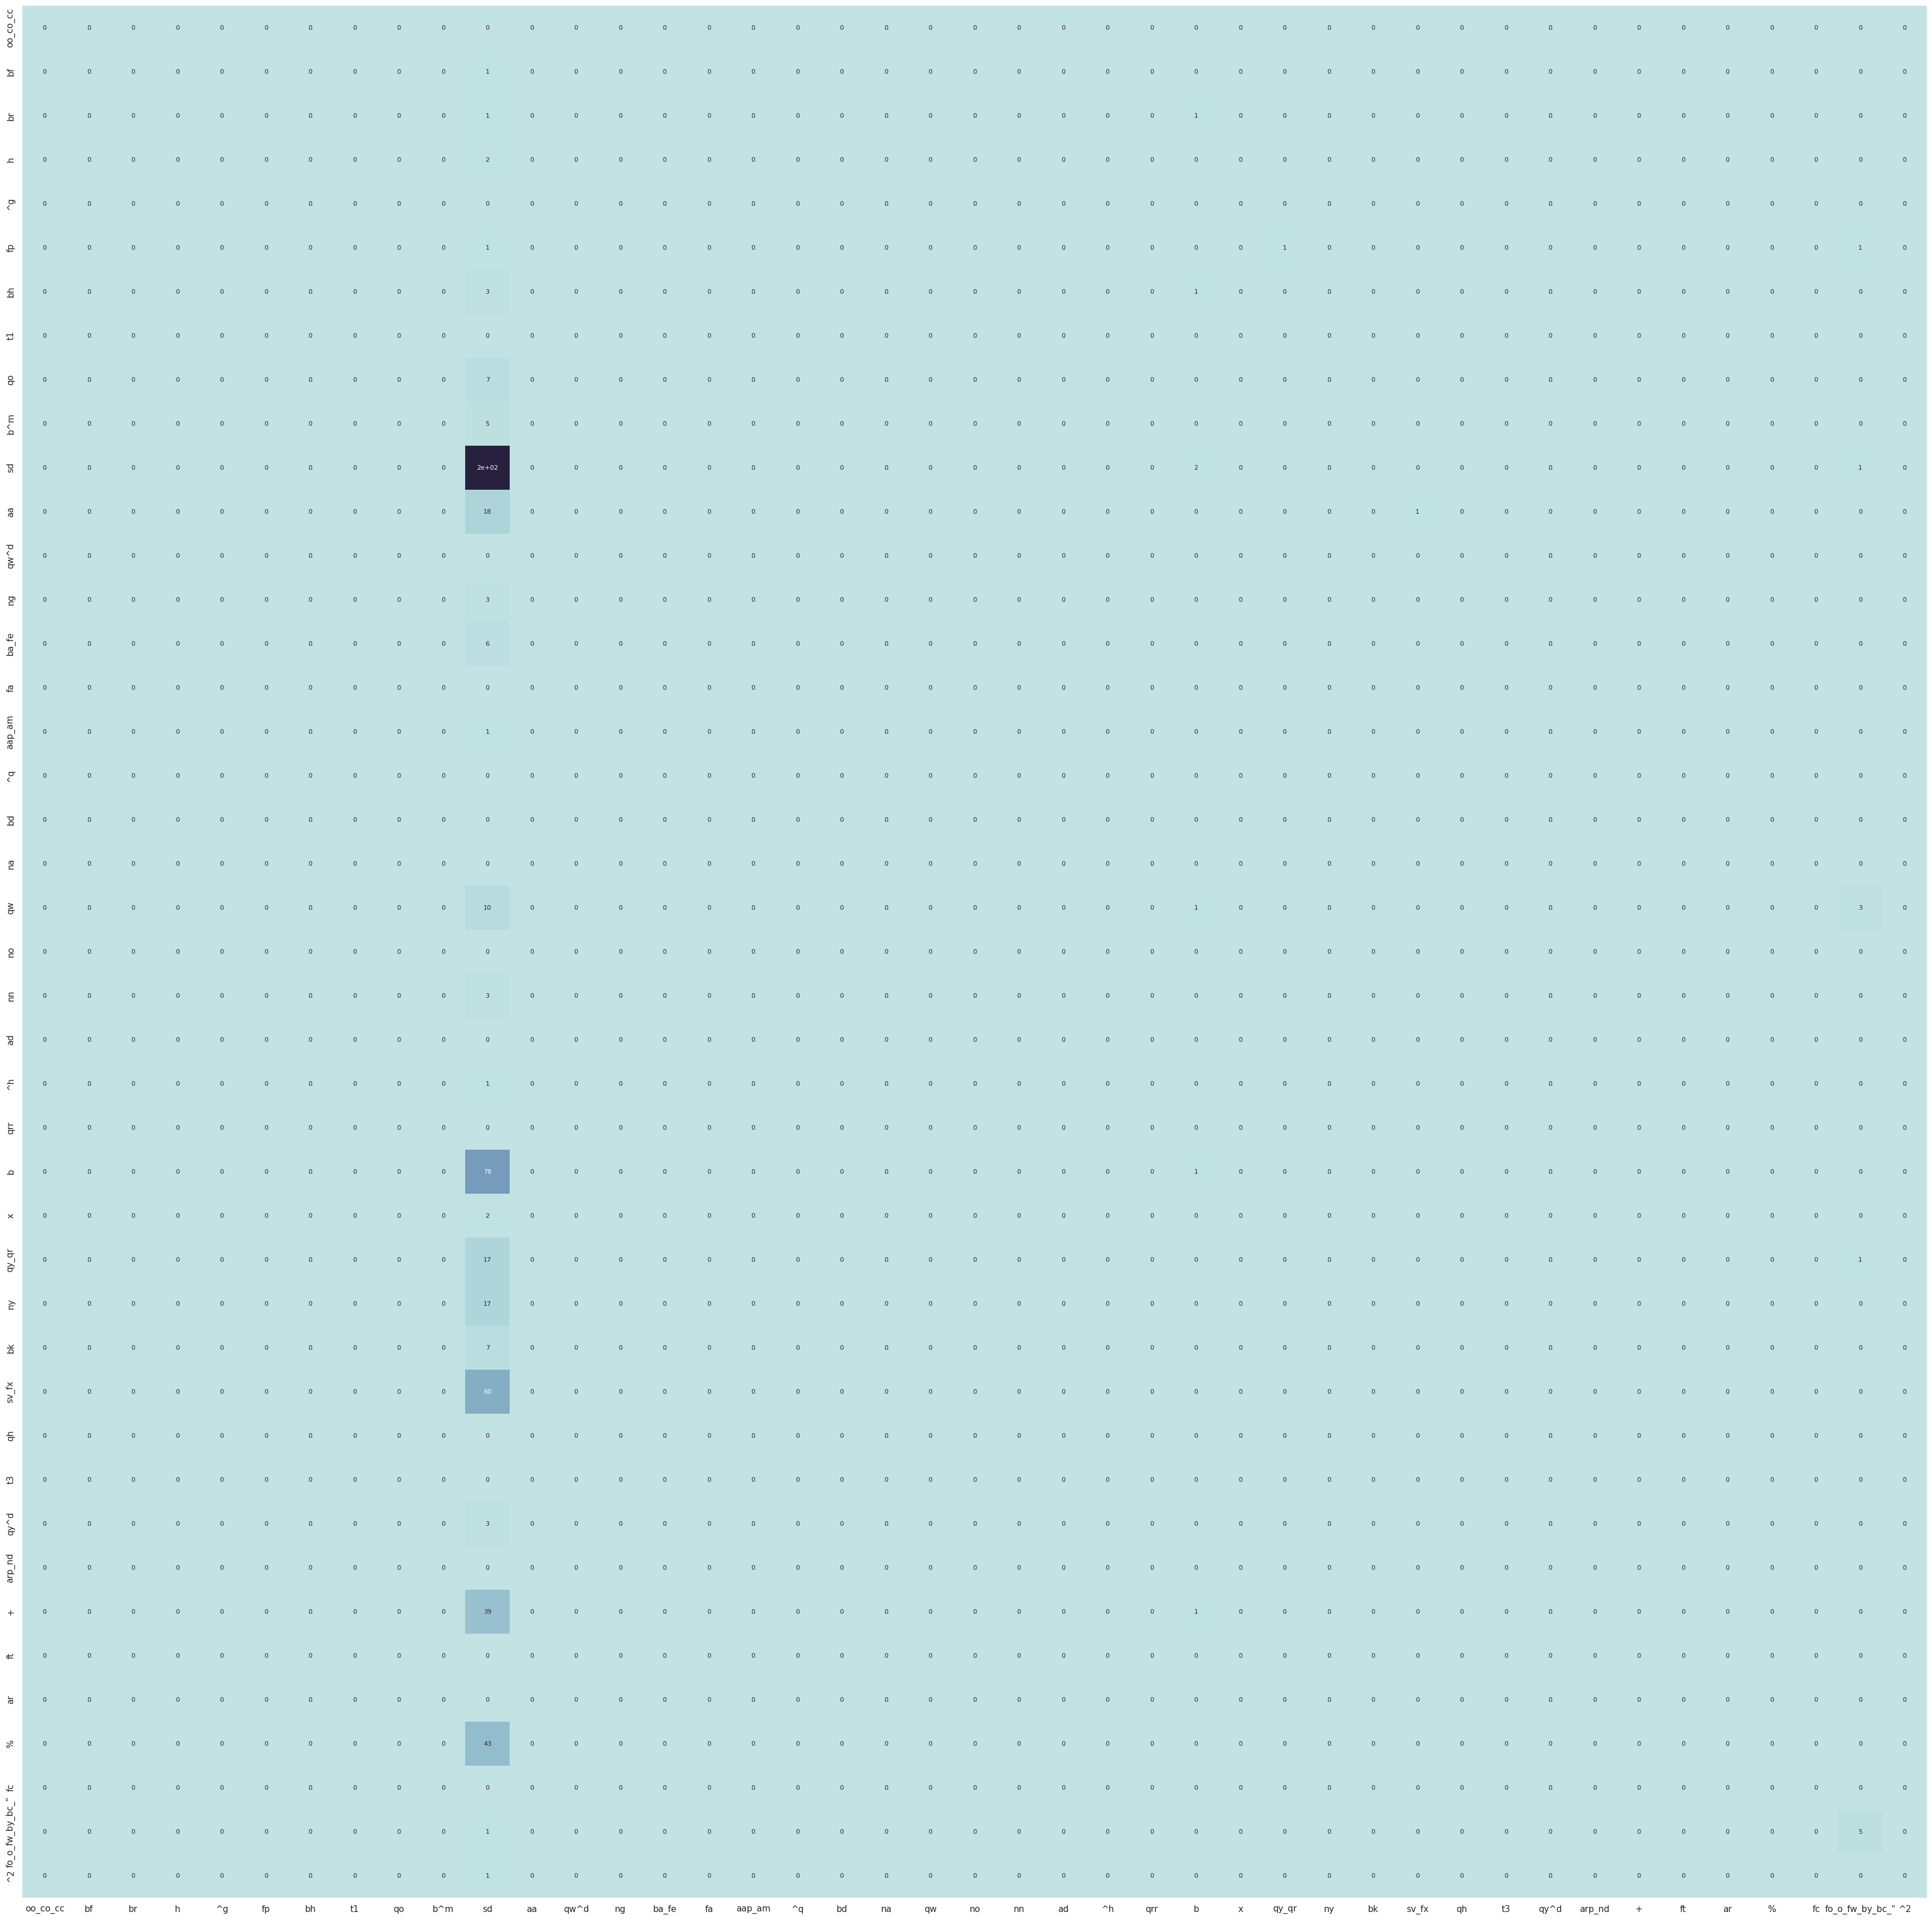

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predic

1/1 [==============================] - 0s 336ms/step


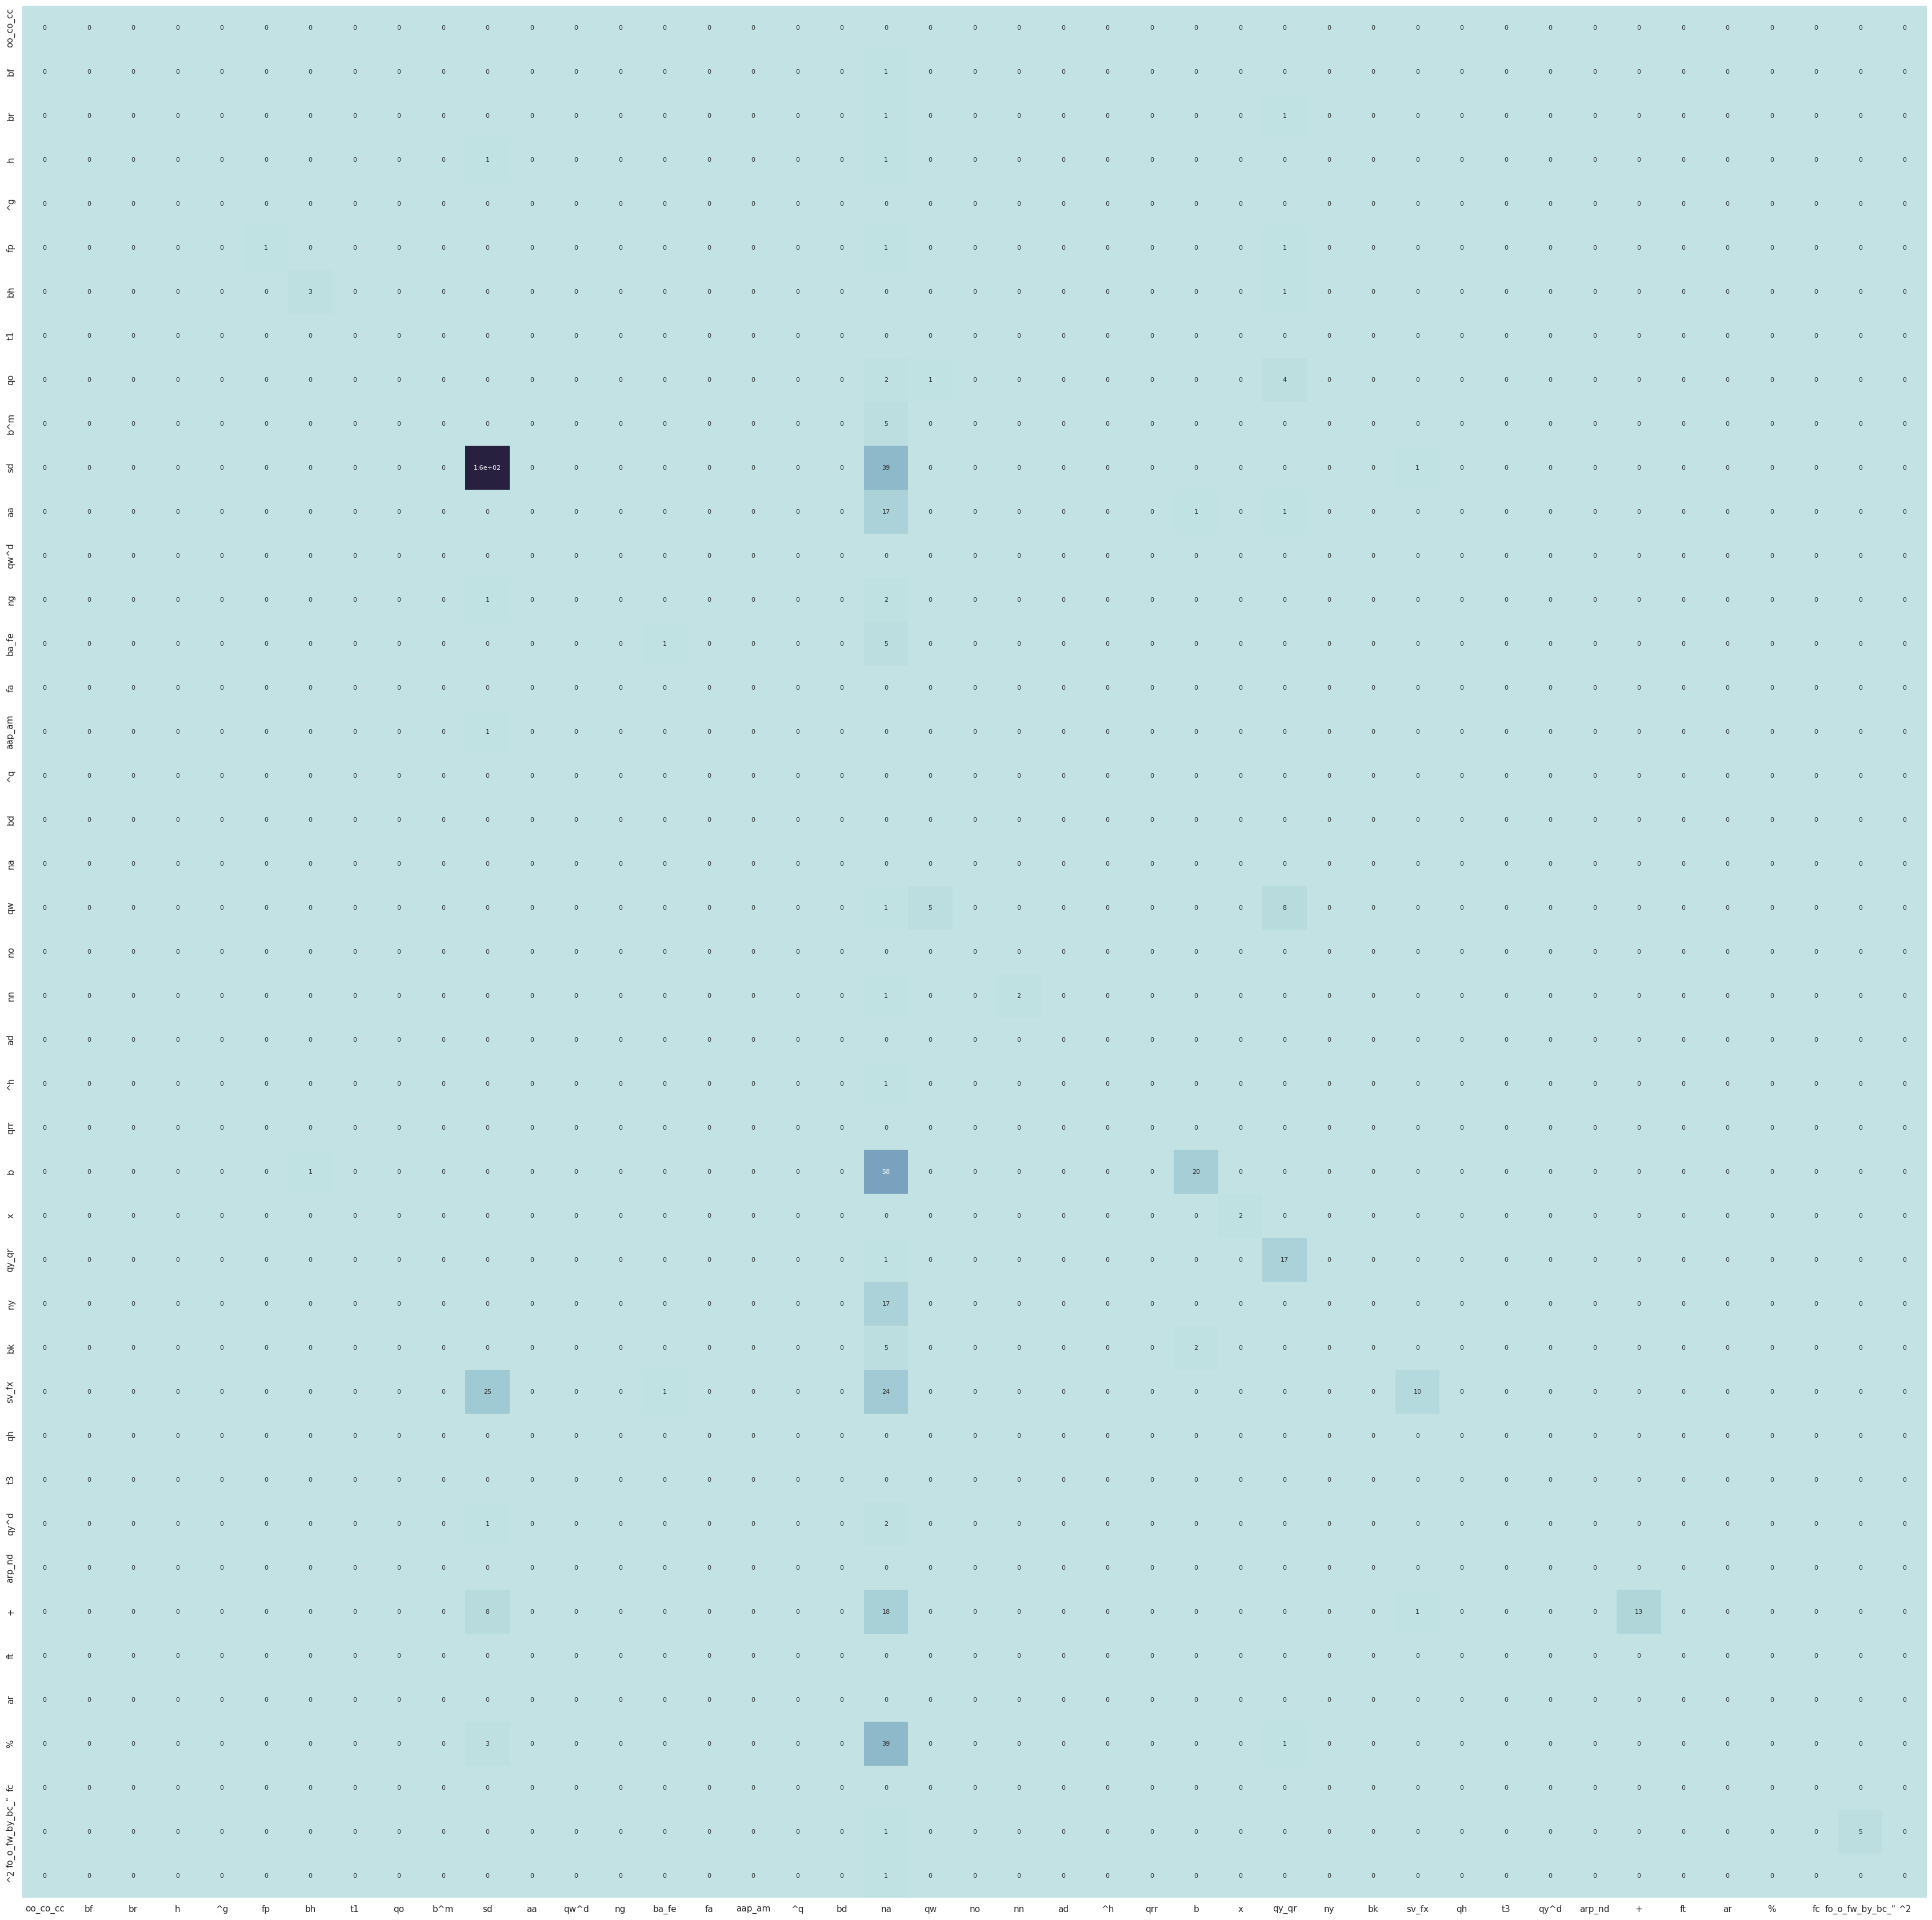

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another archite

1/1 [==============================] - 0s 74ms/step


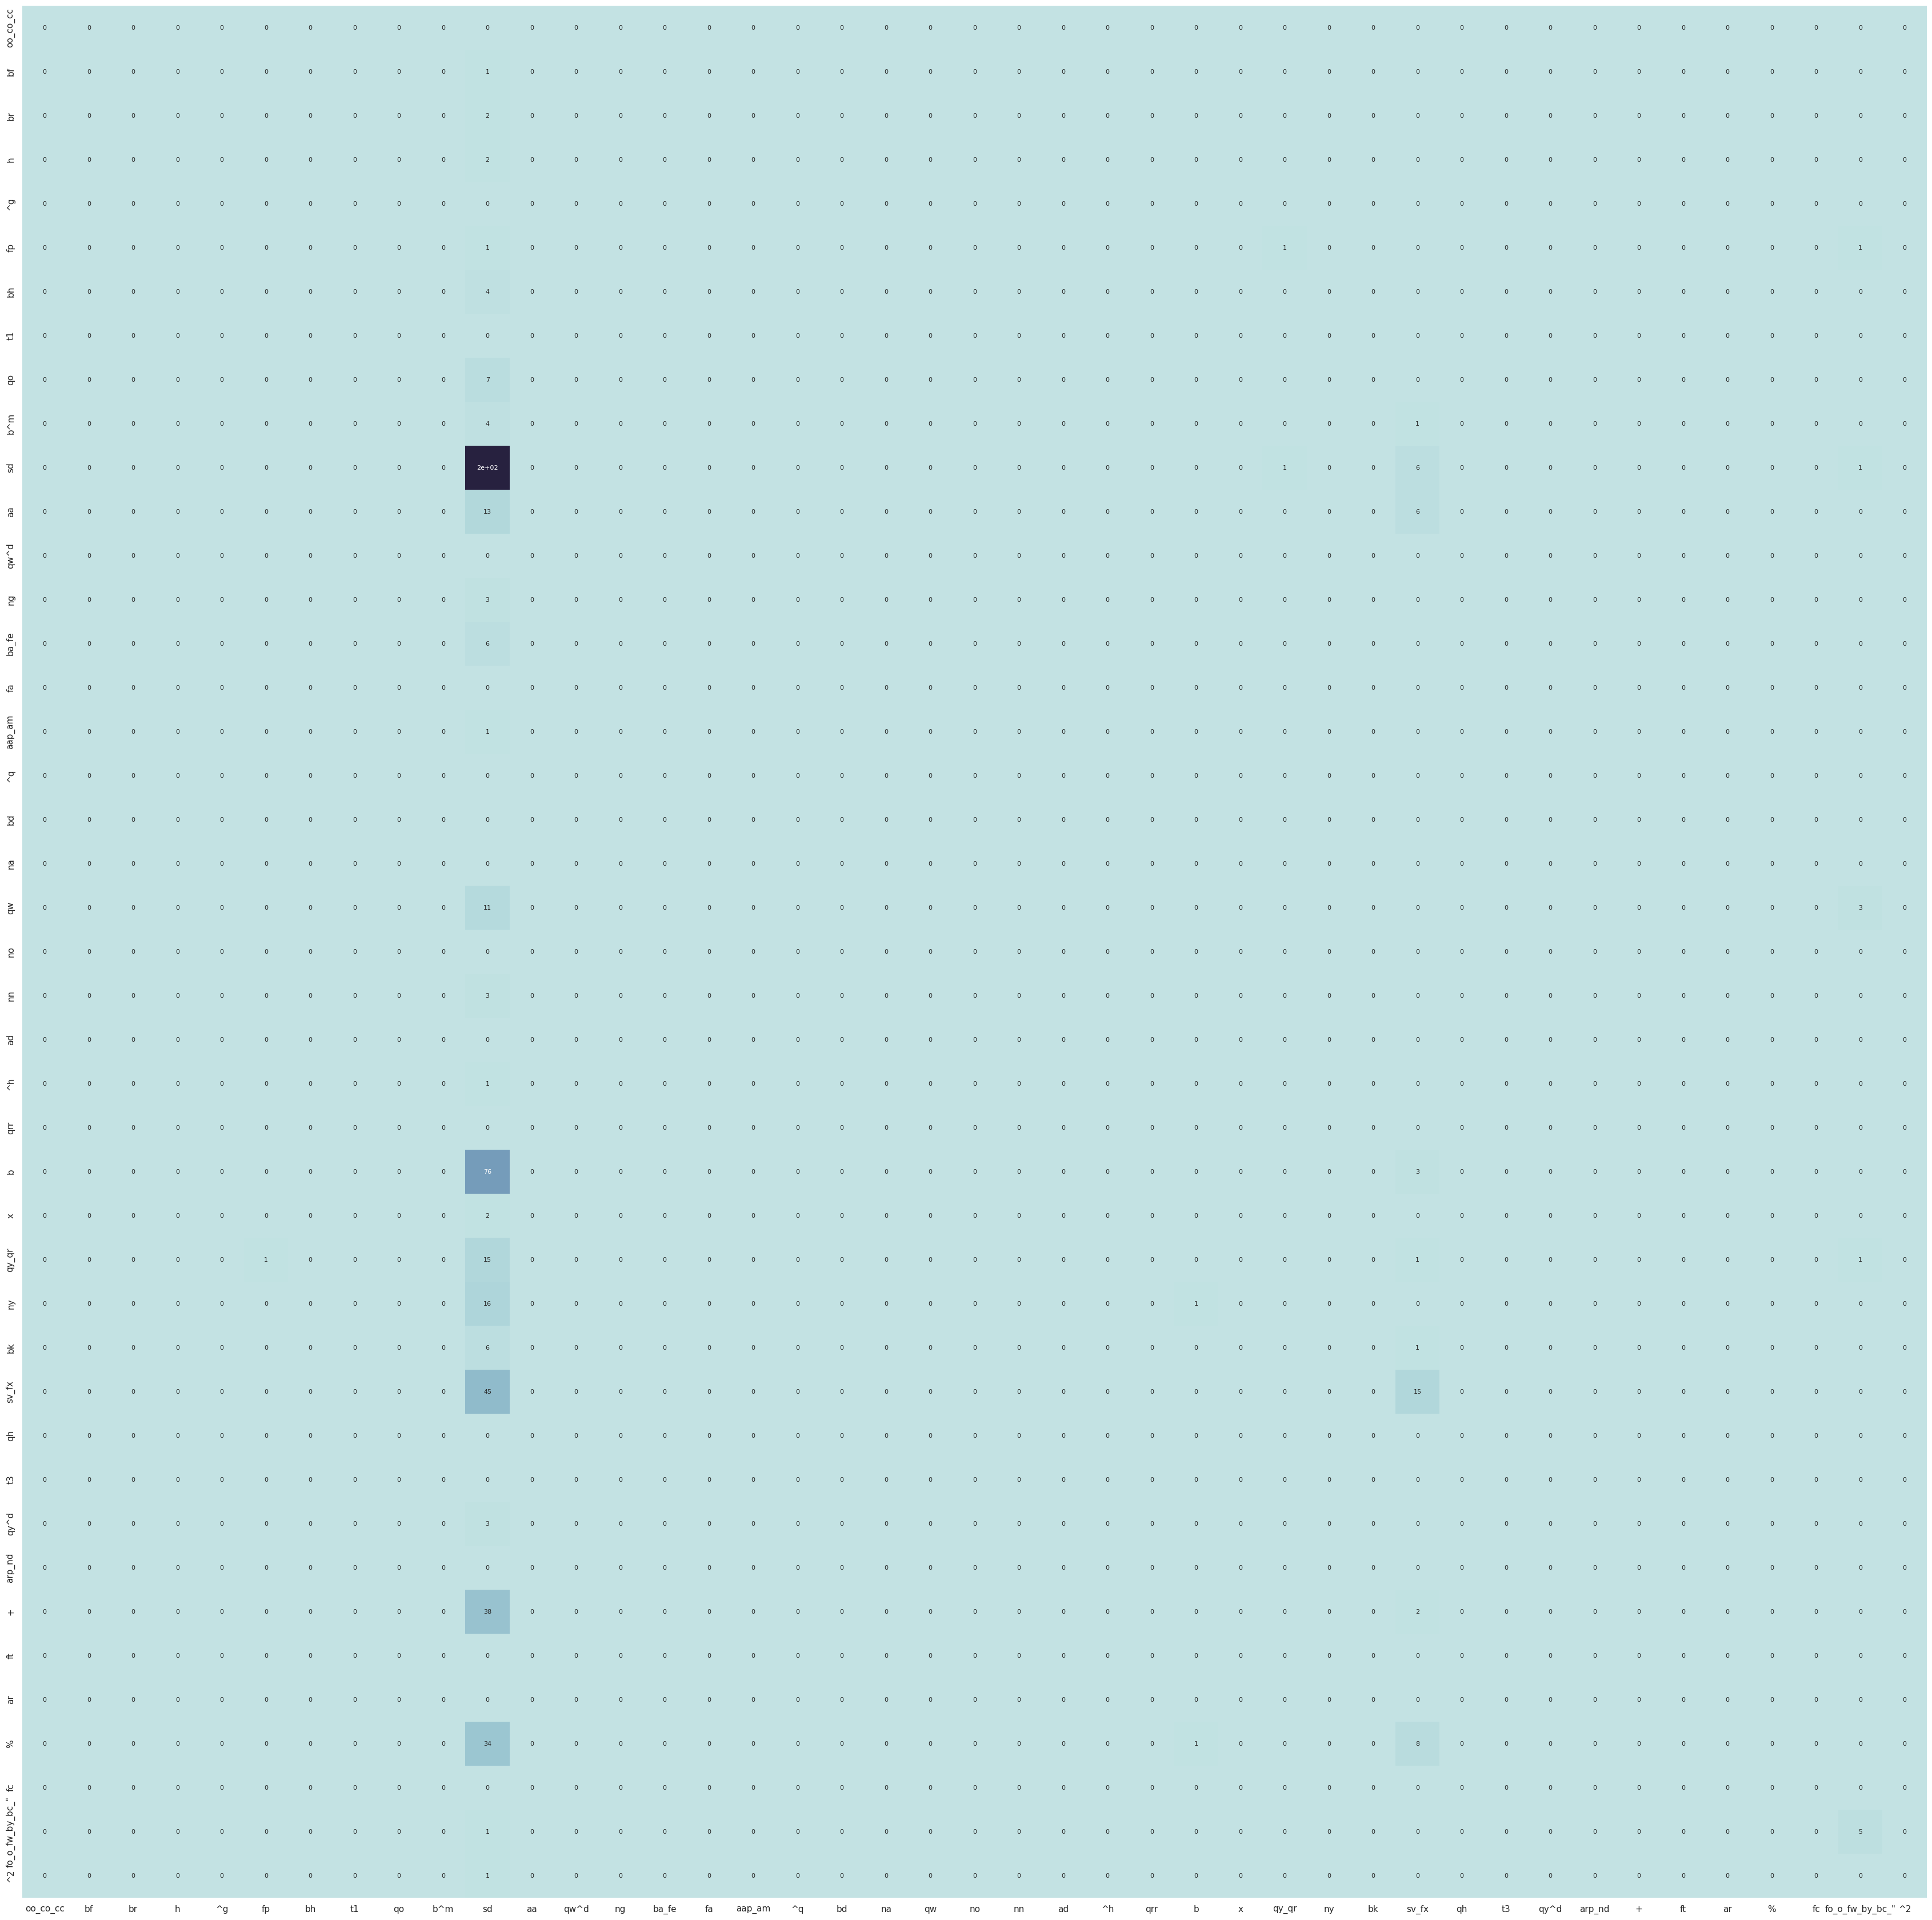

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another archite

1/1 [==============================] - 1s 721ms/step


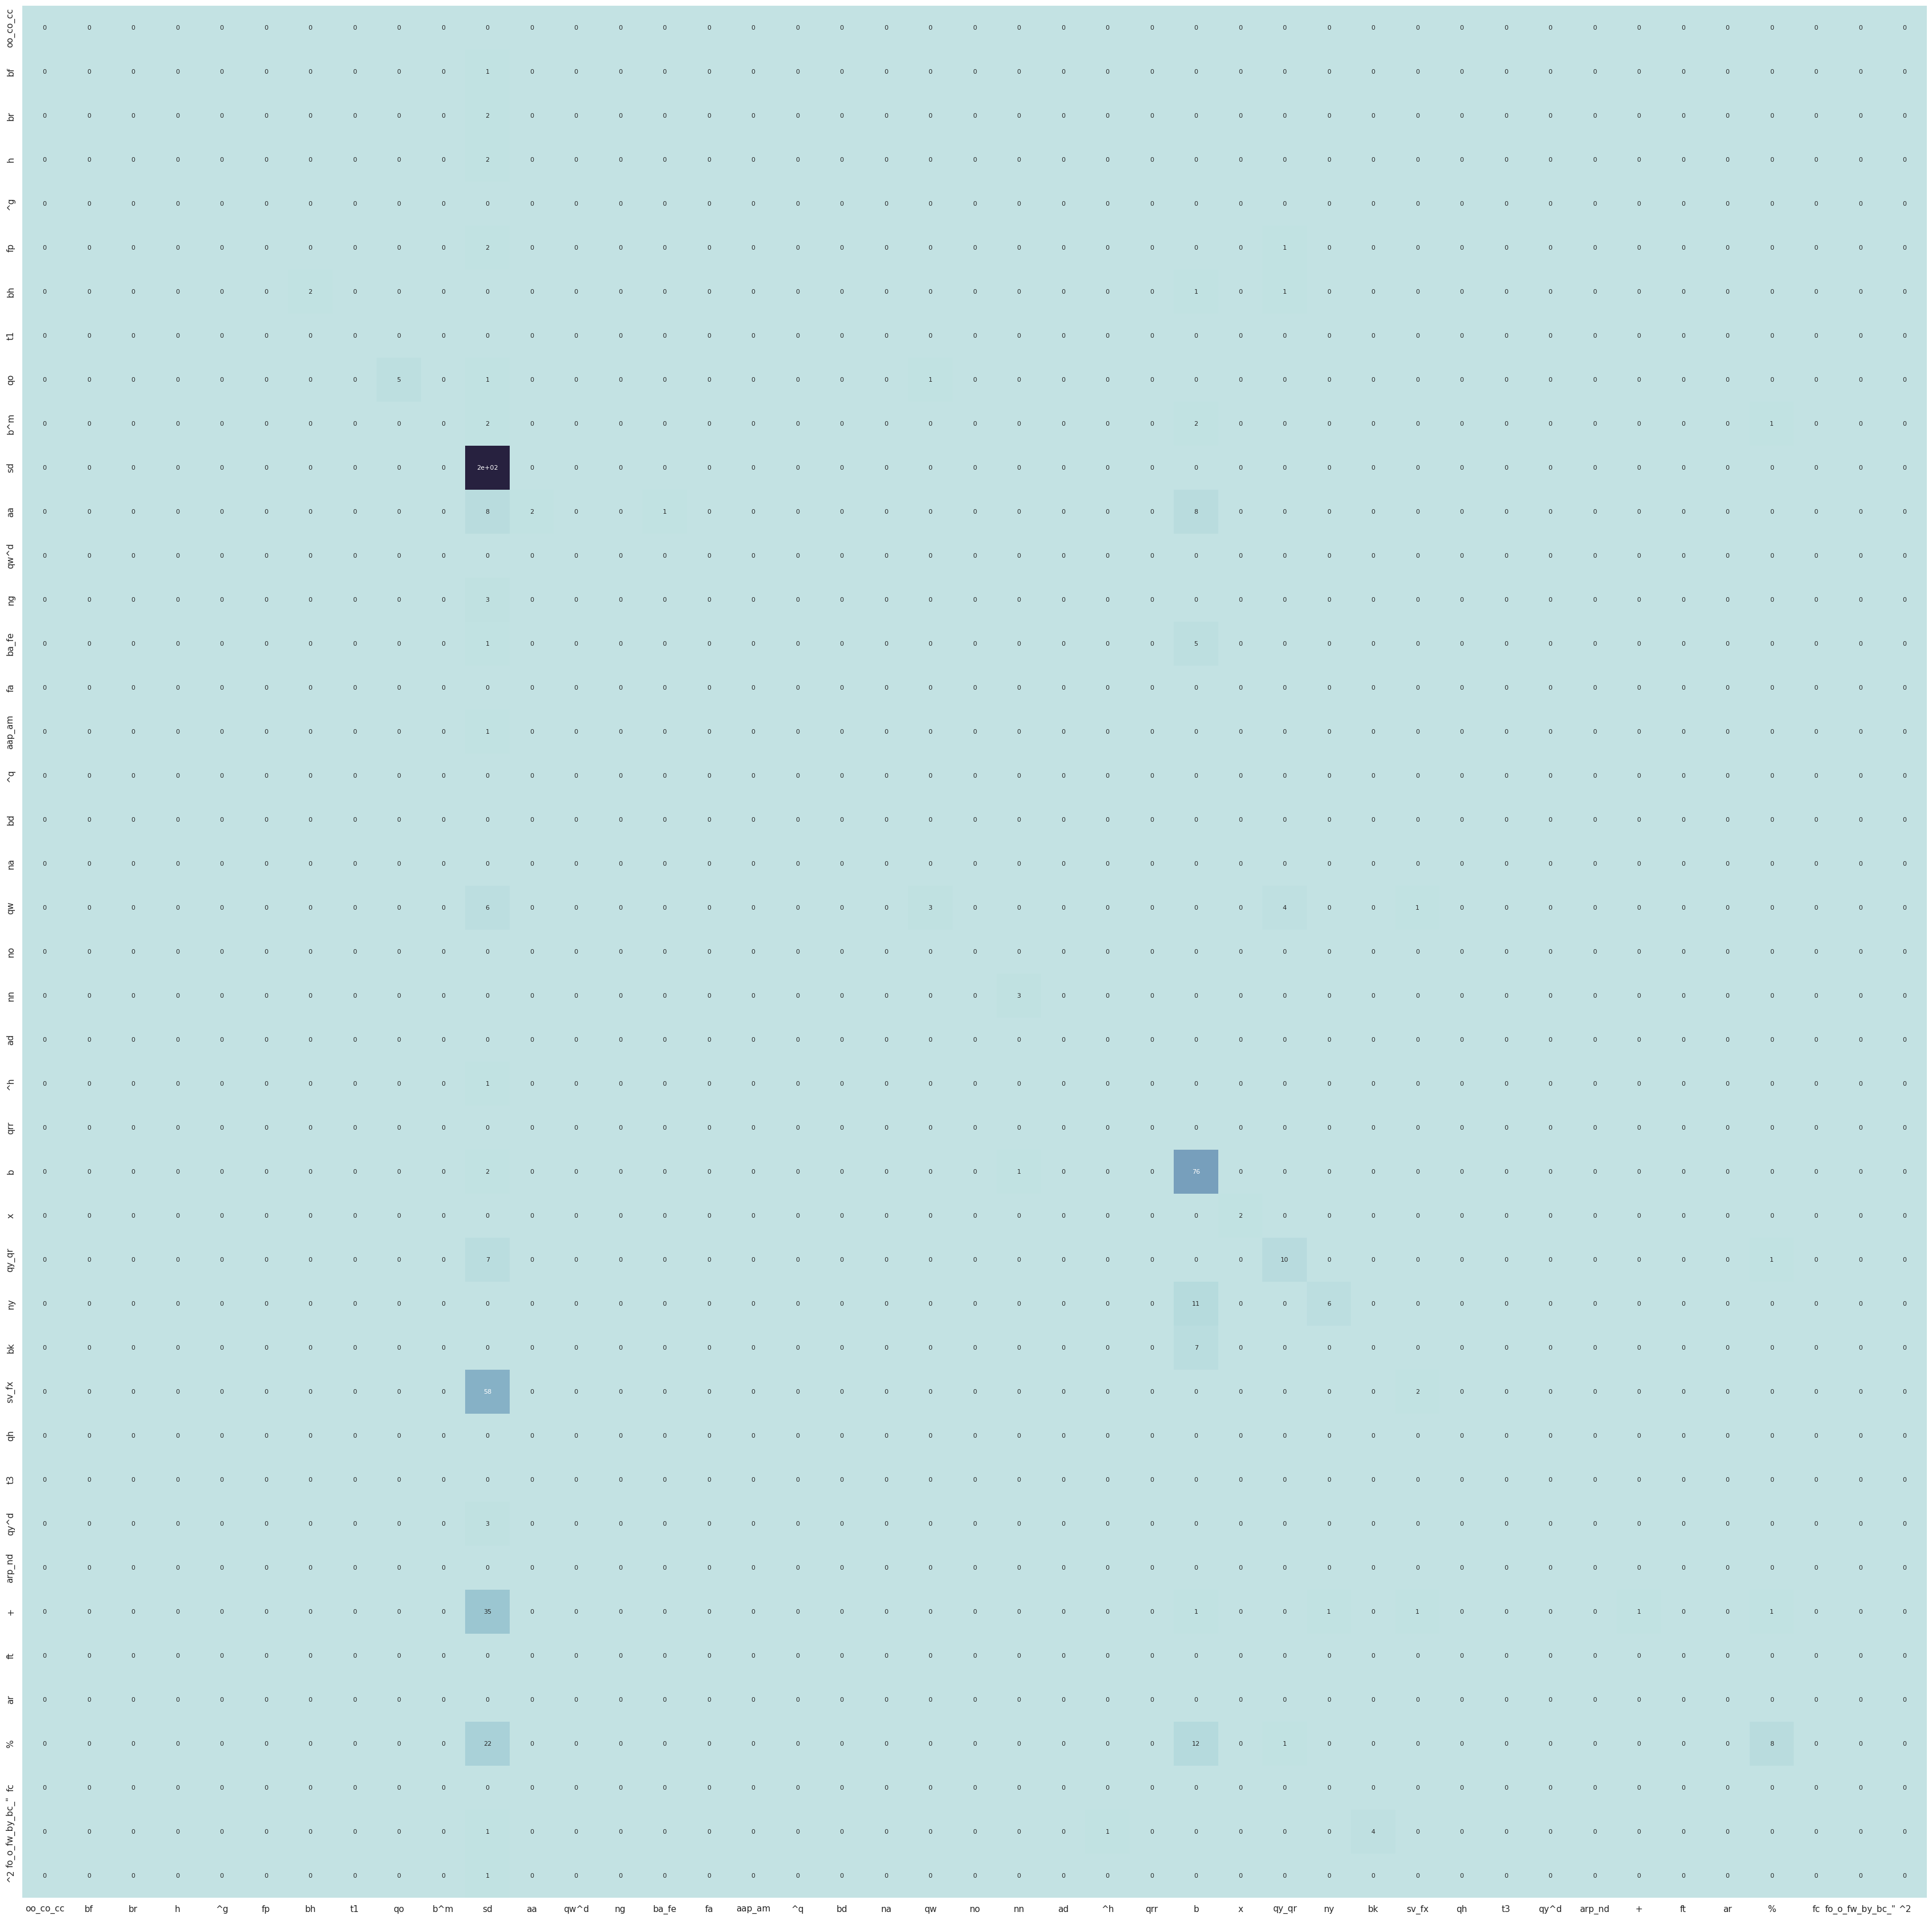

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predic

24/24 [==============================] - 0s 2ms/step


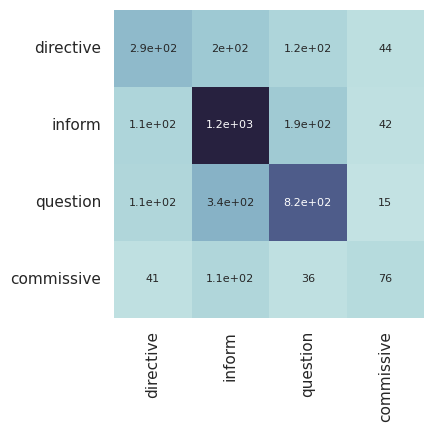

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
for _input in _possible_pipelines["inputs"]:
    _pipeline = Pipeline(_input[0][0], _input[0][1], _input[1], _input[2][0], _input[2][1])
    _pipeline.summarize()
    _pipeline.df_report.to_csv(f"./outputs_data/df_{_input[0][0]}_{_input[1].split('-')[0]}_{_input[2][0]}.csv",
                 index=False,
                 sep="|",
                 encoding='utf-8')
    df_global_report = pd.concat([df_global_report, _pipeline.df_report]).reset_index(drop=True)
    _possible_pipelines["outputs"].append(_pipeline.confusion_matrix)
    df_cm = pd.DataFrame(
    _pipeline.confusion_matrix,
    Format(_input[0][0], _input[0][1], _input[2][1]).get_distincts_labels(),
    Format(_input[0][0], _input[0][1], _input[2][1]).get_distincts_labels())
    d = len(Format(_input[0][0], _input[0][1], _input[2][1]).get_distincts_labels())
    plt.figure(figsize=(d, d))
    sns.set(font_scale=1)
    sns.heatmap(df_cm,
                annot=True,
                annot_kws={"size": 8},
                cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), 
                cbar=False)
    plt.savefig(
        f"../intent_classification/figs/{_input[0][0]}_{_input[1].split('-')[0]}_{_input[2][0]}.pdf")
    plt.show()

In [ ]:
df_global_report

In [ ]:
_possible_pipelines["outputs"]